In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\day.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Display summary statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# Drop unnecessary columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [8]:
# Convert numeric columns to categorical
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')

In [9]:
# Check for any duplicates
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


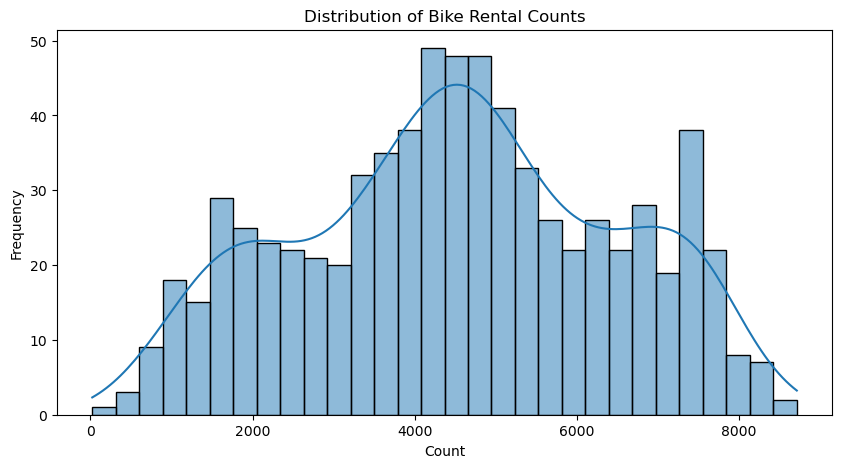

In [10]:
# Exploratory Data Analysis (EDA)
# Distribution of target variable 'cnt'
plt.figure(figsize=(10, 5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

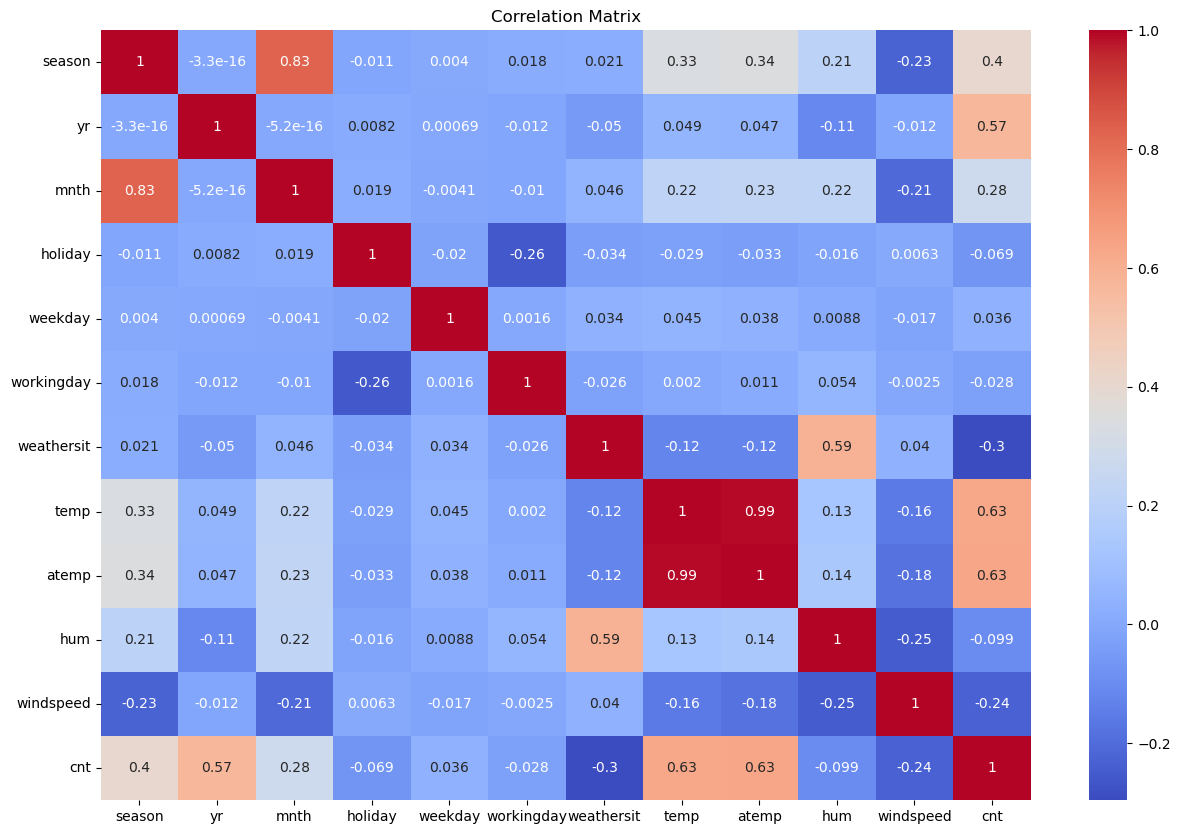

In [11]:
# Correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

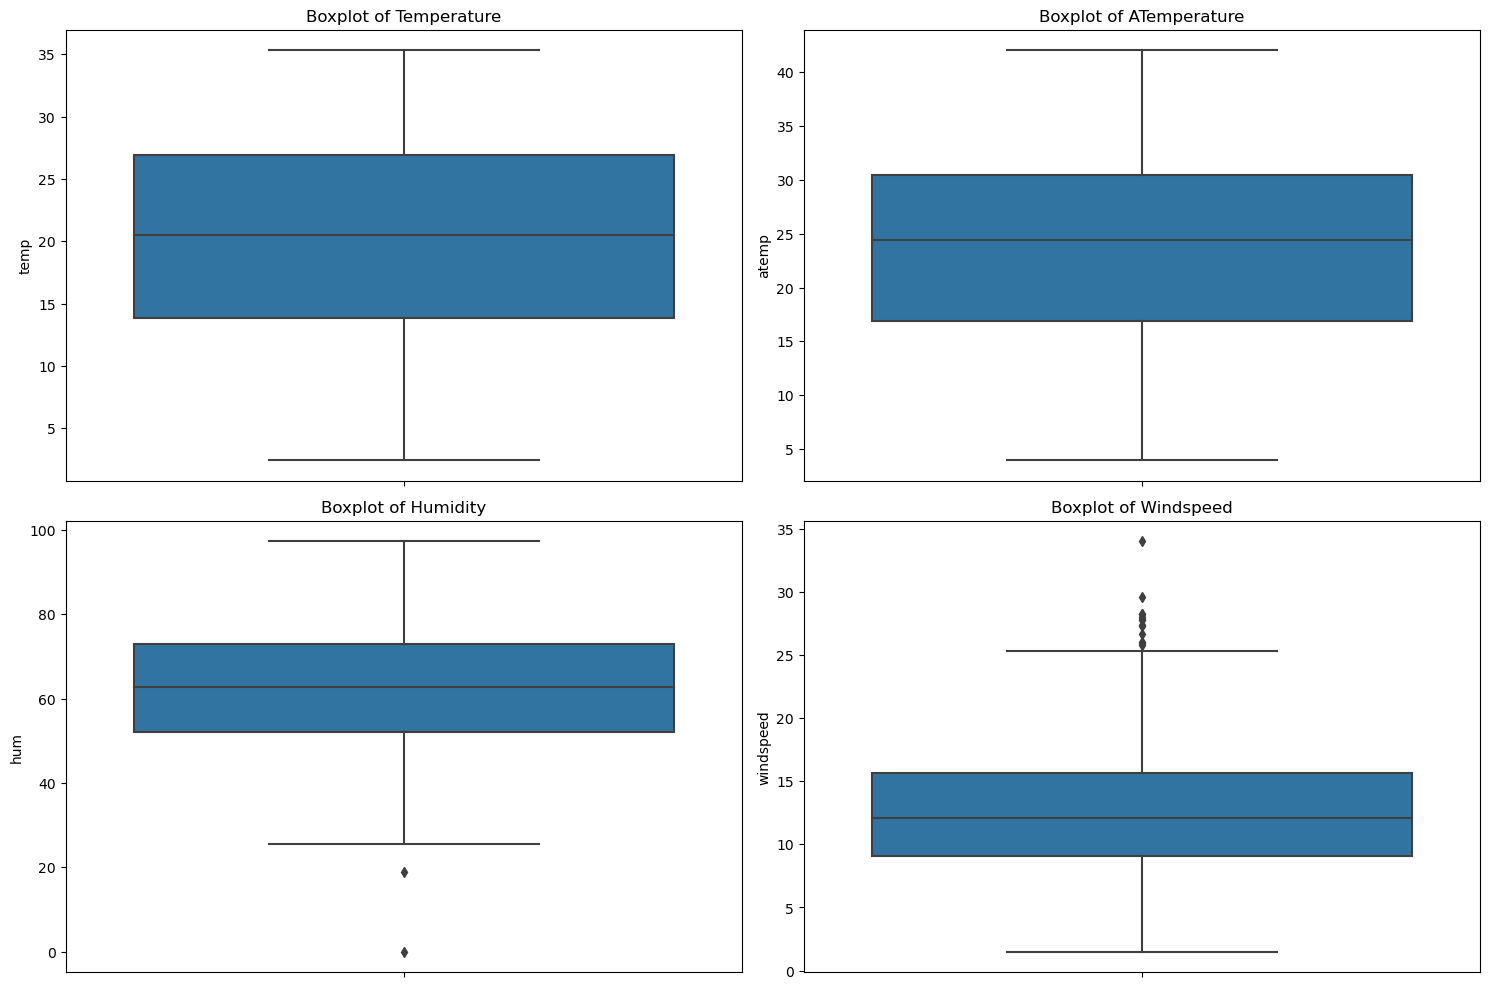

In [12]:
# Boxplot visualization for continuous variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y='temp', data=df)
plt.title('Boxplot of Temperature')

plt.subplot(2, 2, 2)
sns.boxplot(y='atemp', data=df)
plt.title('Boxplot of ATemperature')

plt.subplot(2, 2, 3)
sns.boxplot(y='hum', data=df)
plt.title('Boxplot of Humidity')

plt.subplot(2, 2, 4)
sns.boxplot(y='windspeed', data=df)
plt.title('Boxplot of Windspeed')

plt.tight_layout()
plt.show()

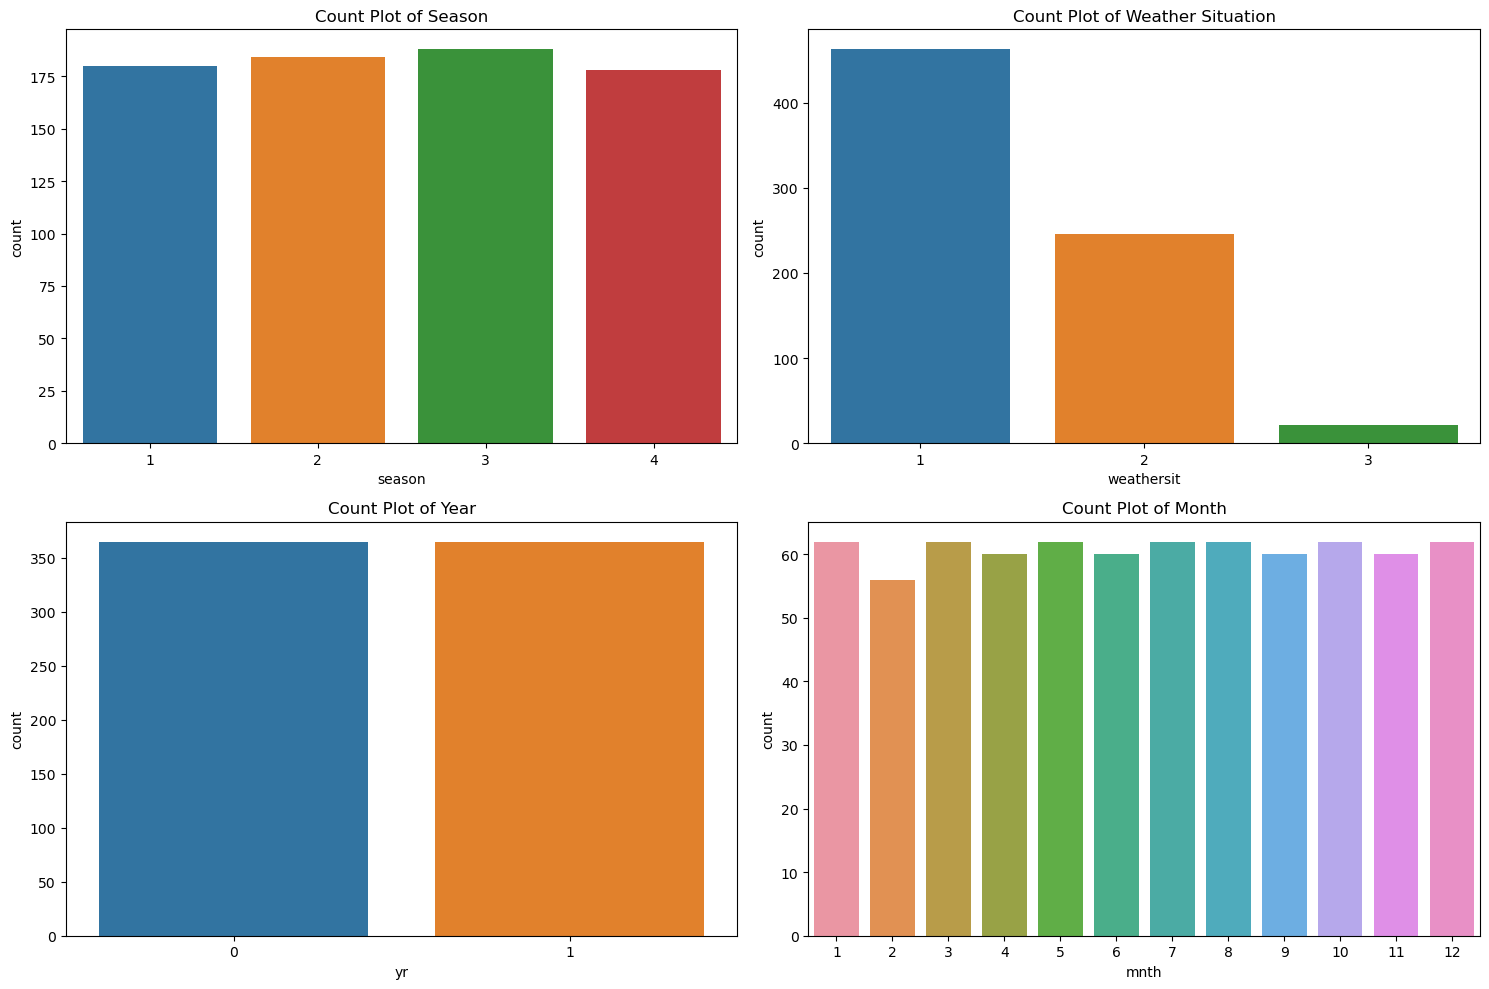

In [13]:
# Count plot for categorical variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='season', data=df)
plt.title('Count Plot of Season')

plt.subplot(2, 2, 2)
sns.countplot(x='weathersit', data=df)
plt.title('Count Plot of Weather Situation')

plt.subplot(2, 2, 3)
sns.countplot(x='yr', data=df)
plt.title('Count Plot of Year')

plt.subplot(2, 2, 4)
sns.countplot(x='mnth', data=df)
plt.title('Count Plot of Month')

plt.tight_layout()
plt.show()

In [14]:
# Create dummy variables for all categorical features
df = pd.get_dummies(df, drop_first=True)

In [15]:
# Ensure all data types are numeric
df = df.apply(pd.to_numeric)

In [16]:
# Split the dataset into training and test sets
X = df.drop(['cnt'], axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Build the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred = lr.predict(X_test)

In [19]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

R-squared score: 0.8333845092587988


In [23]:
# Detailed model summary using statsmodels
X_train_sm = sm.add_constant(X_train)
y_train = y_train.astype(float)  # Ensure y_train is float
X_train_sm = X_train_sm.astype(float)  # Ensure X_train_sm is float
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     110.2
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.37e-179
Time:                        13:20:45   Log-Likelihood:                -4116.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     486   BIC:                             8389.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1636.2570    308.153      5.310   

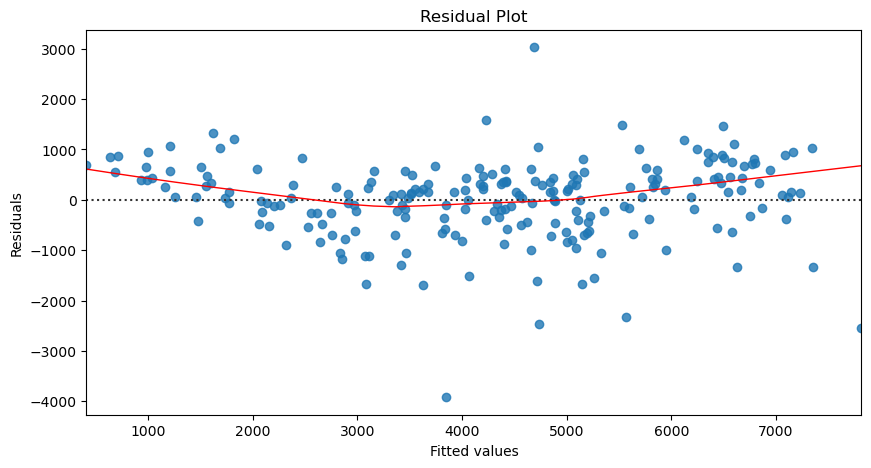

In [24]:
# Residual Analysis
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=(y_test - y_pred), lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

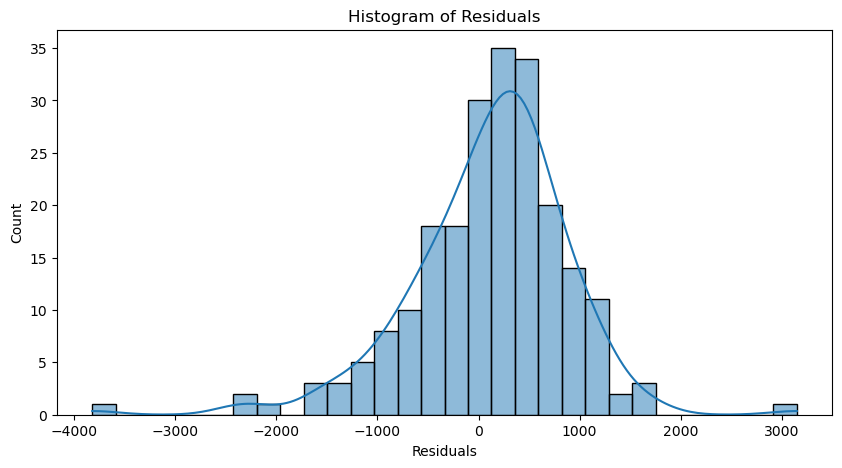

In [25]:
# Histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot((y_test - y_pred), bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

<Figure size 1000x500 with 0 Axes>

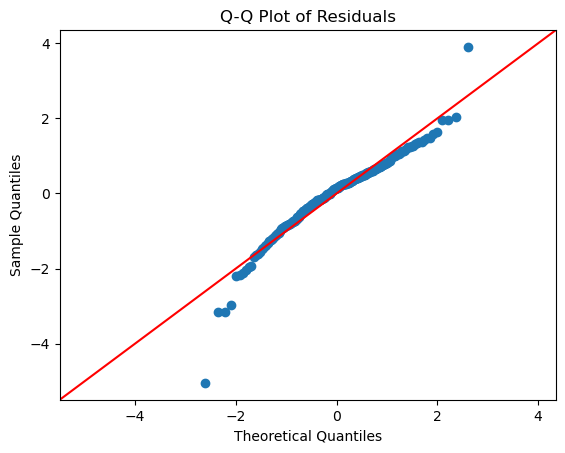

In [26]:
# Q-Q plot of residuals
plt.figure(figsize=(10, 5))
sm.qqplot((y_test - y_pred), line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()